<a href="https://colab.research.google.com/github/srijitghosh19/Machine-Learning/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import warnings
warnings.filterwarnings('ignore')

Importing Dependencies


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [13]:
dataset=pd.read_csv('sample_data/medical_insurance.csv')

In [14]:
dataset.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
dataset.shape


(2772, 7)

Getting Information from data

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


Checking for Missing Values


In [17]:
dataset.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis


In [18]:
dataset.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Distribution of column values
Using displot for numerical data
Using countplot for categorical data

Categorical features : Sex(2 values), Smoker(2 values), Region(4 values)

<Figure size 500x300 with 0 Axes>

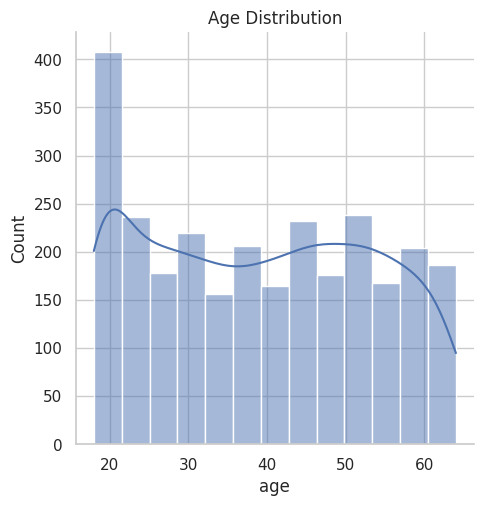

In [19]:
sns.set(style="whitegrid") #helps creating grid
plt.figure(figsize=(5,3))
sns.displot(data=dataset,x="age",kde=True) #kde for smooth curve
plt.title("Age Distribution")
plt.show()

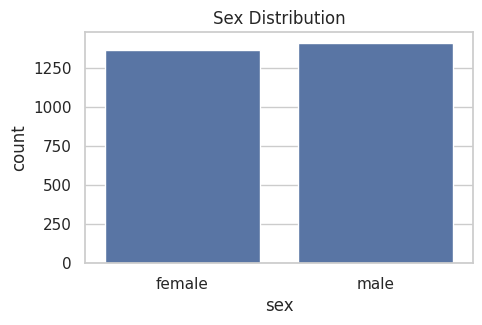

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset,x="sex")
plt.title("Sex Distribution")
plt.show()

<Figure size 500x300 with 0 Axes>

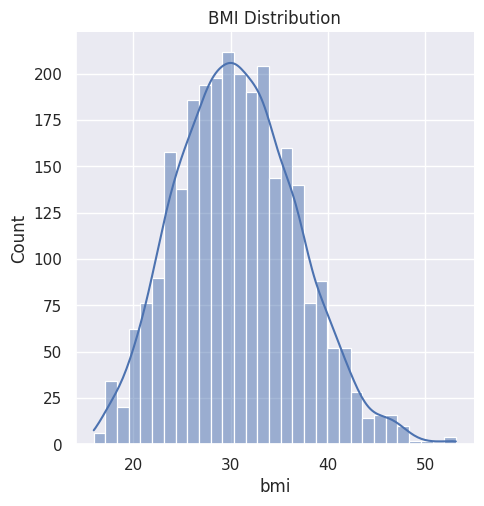

In [21]:
sns.set() #helps creating grid
plt.figure(figsize=(5,3))
sns.displot(data=dataset,x='bmi',kde=True)
plt.title("BMI Distribution")
plt.show()

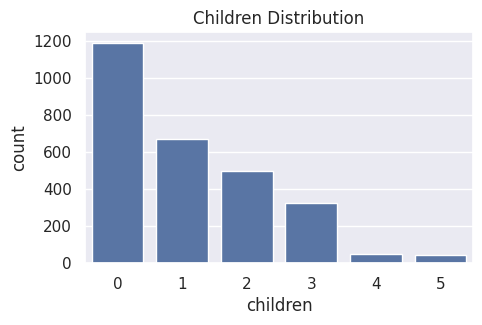

In [22]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset,x="children")
plt.title("Children Distribution")
plt.show()

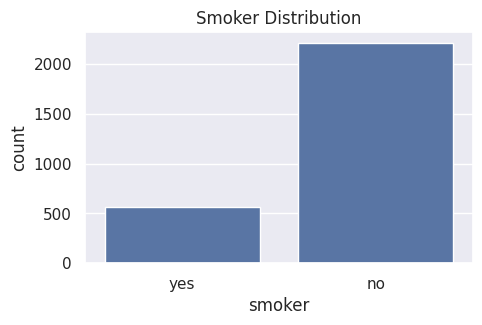

In [23]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset,x="smoker")
plt.title("Smoker Distribution")
plt.show()

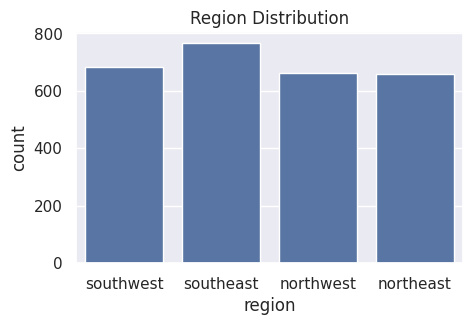

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(data=dataset,x="region")
plt.title("Region Distribution")
plt.show()

<Figure size 500x300 with 0 Axes>

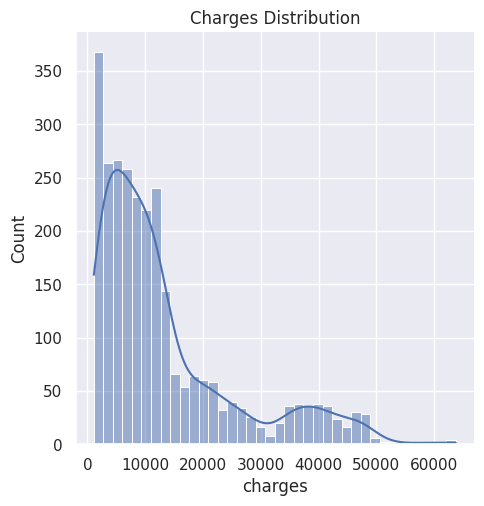

In [25]:
sns.set() #helps creating grid
plt.figure(figsize=(5,3))
sns.displot(data=dataset,x='charges',kde=True)
plt.title("Charges Distribution")
plt.show()

Data Pre-processing

Encoding Categorical Features

In [26]:
dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

In [27]:
dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [28]:
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [29]:
dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


Splitting features and target

In [30]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [31]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
2767   47    1  45.320         1       1       0
2768   21    1  34.600         0       1       1
2769   19    0  26.030         1       0       3
2770   23    0  18.715         0       1       3
2771   54    0  31.600         0       1       1

[2772 rows x 6 columns]


In [32]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64


Splitting dataset into training and testing data

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [34]:
print(x.shape,x_train.shape,x_test.shape)

(2772, 6) (2217, 6) (555, 6)


Model Training

In [35]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Model Evaluation

Prediction on training data

In [36]:
training_pred=lr.predict(x_train)


R square value

In [37]:
r2_train=metrics.r2_score(y_train,training_pred)
print('R squared value: ',r2_train)

R squared value:  0.7561940076387632


Prediction on testing data

In [38]:
testing_pred=lr.predict(x_test)


In [39]:
r2_test=metrics.r2_score(y_test,testing_pred)
print('R squared value: ',r2_test)

R squared value:  0.7272408044903713


Overfitting isn't there as training and testing accuracy is similar

Checking the prediction system

In [40]:
input_data=(28,	0,	33.770,	1,	1,	0)
# Changing input data to numpy array for easier calculation
input_np=np.asarray(input_data)
input=input_np.reshape(1,-1)
prediction=lr.predict(input)
print("The predicted insurance cost is: ",prediction[0])

The predicted insurance cost is:  5905.992102207874


Checking input wrt output

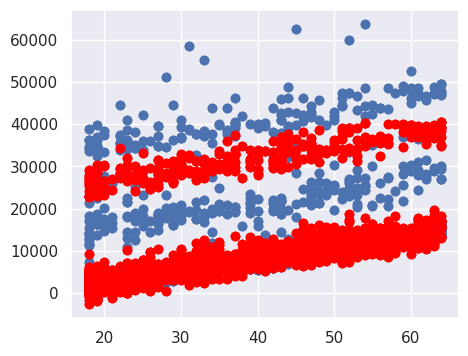

In [41]:
plt.figure(figsize=(5,4))
plt.scatter(dataset['age'],y,label="actual")
plt.scatter(x=dataset['age'],y=lr.predict(x),color="red",label="predicted")
plt.show()

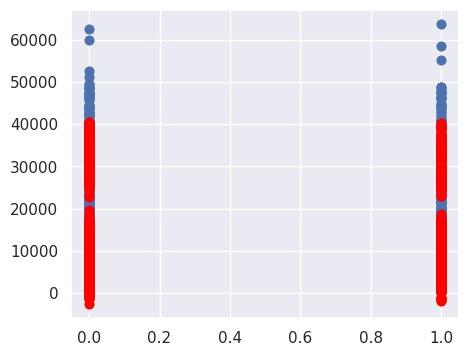

In [42]:
plt.figure(figsize=(5,4))
plt.scatter(dataset['sex'],y,label="actual")
plt.scatter(x=dataset['sex'],y=lr.predict(x),color="red",label="predicted")
plt.show()

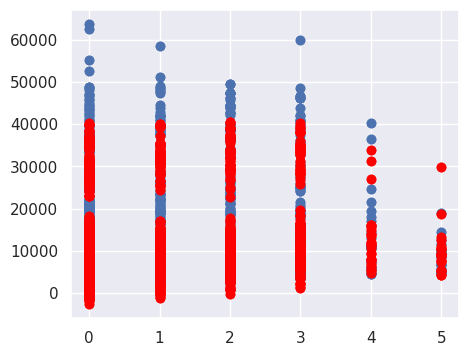

In [43]:
plt.figure(figsize=(5,4))
plt.scatter(dataset['children'],y,label="actual")
plt.scatter(x=dataset['children'],y=lr.predict(x),color="red",label="predicted")
plt.show()

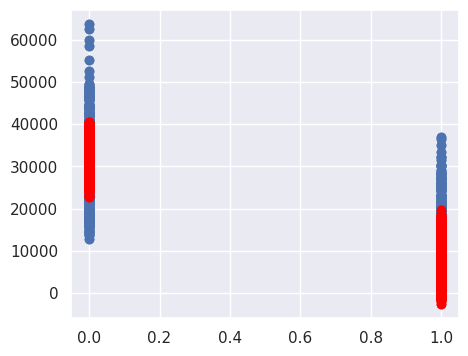

In [44]:
plt.figure(figsize=(5,4))
plt.scatter(dataset['smoker'],y,label="actual")
plt.scatter(x=dataset['smoker'],y=lr.predict(x),color="red",label="predicted")
plt.show()

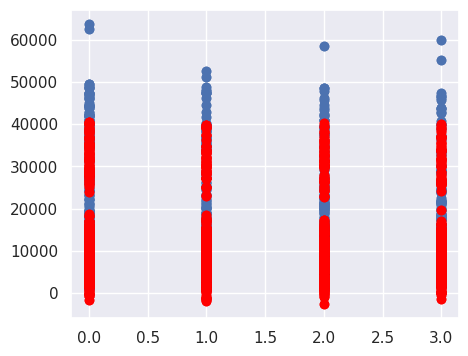

In [45]:
plt.figure(figsize=(5,4))
plt.scatter(dataset['region'],y,label="actual")
plt.scatter(x=dataset['region'],y=lr.predict(x),color="red",label="predicted")
plt.show()

Improving the model

In [46]:
from sklearn.ensemble import RandomForestRegressor

Training

In [47]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Prediction

In [48]:
train_pred = rf.predict(x_train)
r2_train = metrics.r2_score(y_train, train_pred)
print("Random Forest R2 Score:", r2_train)

Random Forest R2 Score: 0.9920210644855402


In [49]:
test_pred = rf.predict(x_test)
r2_test = metrics.r2_score(y_test, test_pred)
print("Random Forest R2 Score:", r2_test)

Random Forest R2 Score: 0.9387443579688223


Overfitting isn't there and accuracy of model has increased significantly.

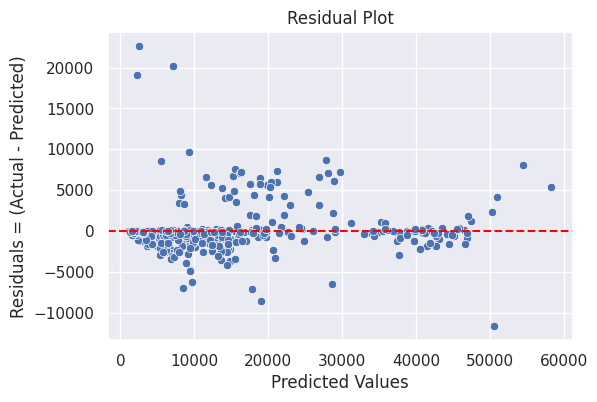

In [50]:
residuals = y_test - test_pred
plt.figure(figsize=(6,4))
sns.scatterplot(x=test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals = (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()